# TP EPITA - 3. Réaffectation des individus dans les groupes avec variables illustratives

Ce notebook contient notre code pour la 3e partie du TP de Kantar. Notre groupe est constitué de :
- Alexandre Devaux-Rivière
- Valentin San
- Maël Reynaud


L'objectif de cette partie est de déterminer la capacité à affecter des individus dans des groupes prédéfinis en utilisant des variables illustratives, sans les variables originales ayant servi à la construction des clusters.

# Segmentation des variables orange depuis les variables en vert

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Nous allons d'abord charger les données pré-traitées résultantes de notre premier notebook.

In [40]:
green_df = pd.read_csv('../data/green_with_labels.csv', sep=';', index_col=0)
green_df.head(10)

,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,...,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,cluster
0,1,0,0,0,1,2.0,0.0,2,2,2,...,2,2,2,2,2,2,2,2,2,3
1,1,0,0,0,1,5.0,0.0,2,0,0,...,4,4,4,4,4,4,4,4,4,0
2,1,0,0,0,1,2.0,0.0,5,5,1,...,4,4,4,4,4,4,4,4,4,0
3,1,1,1,0,1,1.0,0.0,2,3,2,...,4,4,5,5,5,5,5,4,4,1
4,0,1,0,0,2,0.0,1.0,1,1,1,...,4,4,4,4,4,4,4,4,4,4
5,1,0,0,0,1,2.0,0.0,0,1,0,...,5,5,5,5,5,5,5,5,5,1
6,1,0,0,0,1,1.0,0.0,4,2,0,...,5,5,5,5,5,5,5,5,5,1
7,1,0,1,0,1,2.0,0.0,8,4,10,...,3,2,2,1,3,1,3,3,2,3
8,1,0,1,0,3,0.0,4.0,1,1,1,...,4,4,5,5,5,5,5,5,5,4
9,1,0,0,0,1,2.0,0.0,3,3,1,...,4,4,5,5,4,5,5,5,4,1


In [41]:
orange_df = pd.read_csv('../data/orange_with_labels.csv', sep=';', index_col=0)
orange_df.head(10)

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,1
2,1,3,2,2,2,3,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,1,1,2,2,2,3,2,3,2,1,...,1,2,3,3,3,2,2,1,2,0
4,0,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
5,1,3,4,3,3,3,3,3,3,4,...,2,2,2,3,3,2,2,3,3,3
6,1,4,3,3,2,2,3,1,3,1,...,2,2,2,2,2,2,2,2,2,0
7,1,1,2,2,2,3,2,2,2,1,...,1,2,2,2,1,2,2,2,1,1
8,1,2,2,2,2,3,2,3,3,2,...,2,1,2,3,3,3,2,2,2,0
9,1,1,3,4,2,3,1,2,2,3,...,1,1,2,1,2,2,2,3,3,1


Pour les deux segmentations (orange et verte), nous allons utiliser les variables suivantes :

In [42]:
illustrative_columns = ['rs3', 'rs5', 'rs6', 'RS1', 'RS191', 'RS192', 'RS193', 'RS102RECAP', 'rs11recap2', 'RS11recap', 'RS193bis', 'RS2Recap', 'RS56Recap', 'RS2', 'RS11', 'RS102']

In [43]:
df = pd.read_csv('../data/fic_epita_kantar_codes.csv', sep= ';')

In [44]:
df['cluster_orange'] = orange_df['cluster']
df['cluster_vert'] = green_df['cluster']

df.head(10)

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102,cluster_orange,cluster_vert
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,1,2,NaN,1,1,24,0,4,0,3
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,1,2,NaN,4,1,50,0,1,1,0
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,1,NaN,3,2,37,1,3,0,0
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,1,2,NaN,5,3,63,0,2,0,1
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,1,NaN,3,1,44,1,3,0,4
5,6,MET20_1829765,0.694763,1,0,0,0,1,2.0,NaN,...,3,1,NaN,3,1,37,2,4,3,1
6,7,MET20_1217616,1.310091,1,0,0,0,1,1.0,NaN,...,1,2,NaN,2,2,29,0,2,0,1
7,8,MET20_7007782,1.608172,1,0,1,0,1,2.0,NaN,...,3,1,NaN,2,2,26,2,4,1,3
8,9,MET20_1210371,0.878135,1,0,1,0,3,NaN,4.0,...,1,2,NaN,6,3,73,0,2,0,4
9,10,MET20_1879265,0.763194,1,0,0,0,1,2.0,NaN,...,3,1,NaN,3,1,36,2,4,1,1


On s'assure maintenant de garder seulement l'union des colonnes vertes, orange, les clusters, et les colonnes illustratives données dans le sujet.

In [45]:
green_columns = list(green_df.columns)
green_columns.remove('cluster')

orange_columns = list(orange_df.columns)
orange_columns.remove('cluster')

In [46]:
cols = green_columns + orange_columns + illustrative_columns + ['cluster_orange', 'cluster_vert']
print("Sum of columns: nb =", len(cols))
cols = list(set(cols))
print("Unique columns: nb =", len(cols))

cols

Sum of columns: nb = 83
Unique columns: nb = 82


['A9_12_slice',
 'RS11recap',
 'A11_12_slice',
 'A11_8_slice',
 'A11_11_slice',
 'C1_2_slice',
 'A10_2_slice',
 'B1_1_slice',
 'A9_3_slice',
 'A5',
 'C1_9_slice',
 'A11_10_slice',
 'rs11recap2',
 'A10_4_slice',
 'cluster_vert',
 'A8_2_slice',
 'A9_1_slice',
 'C1_1_slice',
 'C1_6_slice',
 'C1_7_slice',
 'B2_2_slice',
 'A11_9_slice',
 'B3',
 'A9_11_slice',
 'A9_7_slice',
 'RS192',
 'A10_8_slice',
 'RS191',
 'RS11',
 'A10_6_slice',
 'A9_6_slice',
 'B1_2_slice',
 'RS102',
 'A8_3_slice',
 'A4',
 'A8_4_slice',
 'C1_5_slice',
 'A13',
 'C1_4_slice',
 'A11_7_slice',
 'RS2Recap',
 'B2_1_slice',
 'A11_4_slice',
 'A9_10_slice',
 'A9_15_slice',
 'A9_14_slice',
 'A11_13_slice',
 'A11_1_slice',
 'A9_5_slice',
 'A10_5_slice',
 'rs5',
 'RS193bis',
 'cluster_orange',
 'RS193',
 'A5bis',
 'A9_16_slice',
 'RS56Recap',
 'A11_6_slice',
 'A12',
 'rs3',
 'RS2',
 'A10_7_slice',
 'C1_3_slice',
 'A11_5_slice',
 'B6',
 'A11_3_slice',
 'rs6',
 'RS102RECAP',
 'A14',
 'A8_1_slice',
 'A9_4_slice',
 'A10_3_slice',
 'A

In [47]:
df = df[cols]
df.head(10)

,A9_12_slice,RS11recap,A11_12_slice,A11_8_slice,A11_11_slice,C1_2_slice,A10_2_slice,B1_1_slice,A9_3_slice,A5,...,A9_2_slice,RS1,C1_8_slice,A9_13_slice,A11_2_slice,A10_1_slice,A9_9_slice,B4,A11,A9_8_slice
0,2,2,2,2,2,2,2,2,2,2.0,...,2,1,2,2,2,2,2,2,1,2
1,1,2,2,2,2,4,1,2,1,5.0,...,1,1,4,1,2,1,1,3,1,1
2,3,1,2,2,2,4,2,2,2,2.0,...,2,2,4,2,2,2,2,3,1,2
3,3,2,1,3,2,4,2,4,2,1.0,...,2,2,4,3,2,2,1,4,1,2
4,2,1,2,2,2,4,2,4,2,NaN,...,2,1,4,2,2,2,2,4,0,2
5,3,1,3,3,2,5,2,3,3,2.0,...,4,2,5,3,2,2,4,4,1,3
6,3,2,2,2,2,5,2,2,3,1.0,...,3,2,5,2,2,2,1,4,1,3
7,1,1,2,2,2,2,1,2,2,2.0,...,2,1,3,2,1,2,1,2,1,2
8,3,2,2,3,2,4,1,4,2,NaN,...,2,2,5,4,2,1,2,3,1,3
9,2,1,3,1,2,4,1,3,4,2.0,...,3,2,5,2,1,1,3,4,1,2


### Approche et initialisation du pipeline d'analyse 

Nous élaborons maintenant une fonction *affectation* qui nous permettra d'entrainer un nouveau *RandomForestClassifier* pour nous permettre d'affecter un cluster à chacune des lignes des dataframes passés en paramètre, en fonction: soit des variables de l'autre couleur / des variables illustratives données dans le sujet.

Pour notre modèle, nous reprenons les hyper-paramètres qui ont le mieux fonctionné dans nos anciennes études, à savoir:
- n_estimators=1000
- min_samples_leaf=1 (déjà à 1 par défaut)
- le reste des paramètres à défaut suffira.

In [48]:
def affectation(all_data: pd.DataFrame, target_column: list, illustrative_vars: list):
    X = all_data[illustrative_vars]
    y = all_data[target_column]

    # train (80%)/ test split (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=1000, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    return clf, accuracy, conf_matrix

## Segmentation de la partie orange en utilisant les variables vertes


Cluster orange avec variables vertes - Précision : 0.53


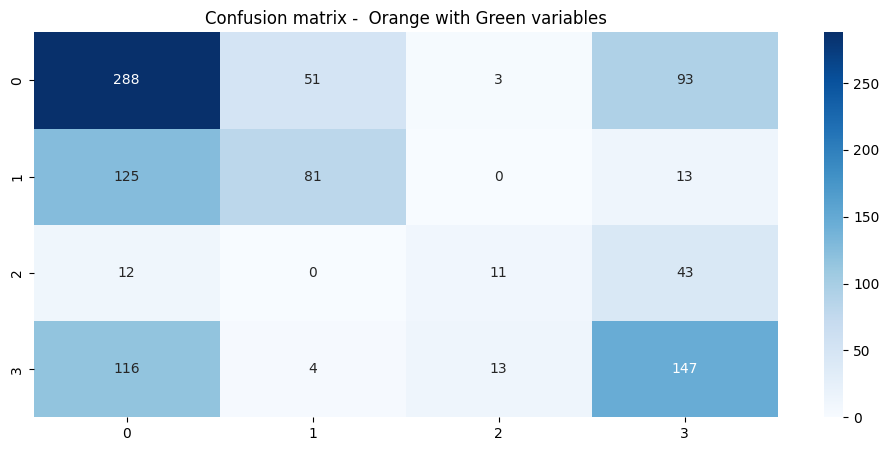

In [49]:
clf_orange_vert, acc_orange_vert, conf_orange_vert = affectation(
    df, 'cluster_orange', green_columns
)
print(f"Cluster orange avec variables vertes - Précision : {acc_orange_vert:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_orange_vert, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Orange with Green variables')
plt.show()

On se rend compte que le *RandomForestClassifier* n'obtient pas de performances efficaces pour la prédiction des clusters oranges à partir des variables vertes avec un score de seulement 53% d'accuracy.

## Segmentation de la partie orange en utilisant les variables spécifiques

Cluster orange avec variables spécifiques - Précision : 0.34


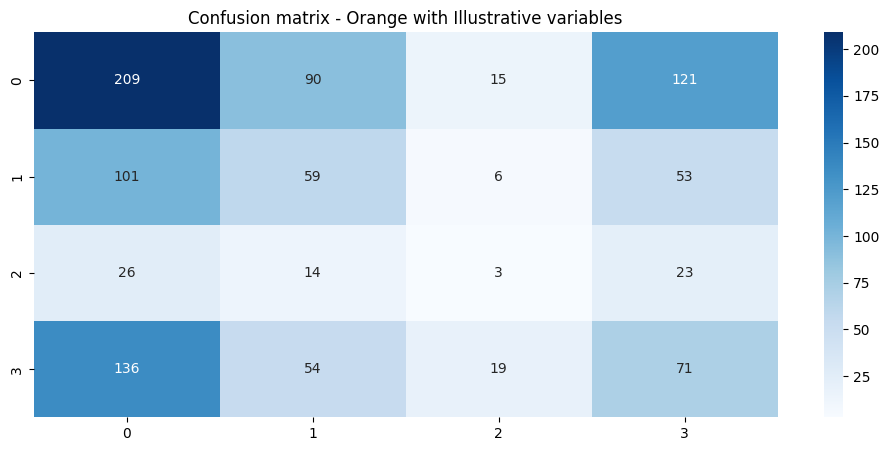

In [ ]:
clf_orange_spec, acc_orange_spec, conf_orange_spec = affectation(
    df, 'cluster_orange', illustrative_columns
)
print(f"Cluster orange avec variables spécifiques - Précision : {acc_orange_spec:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_orange_spec, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Orange with Illustrative variables')
plt.show()

Ici, notre *RandomForestClassifier* a de mauvaises performances la prédiction des clusters oranges à partir des variables spécifique comme on le remarque avec un score de seulement 34% d'accuracy.

## Segmentation de la partie verte en utilisant les variables orange

Cluster orange avec variables spécifiques - Précision : 0.65


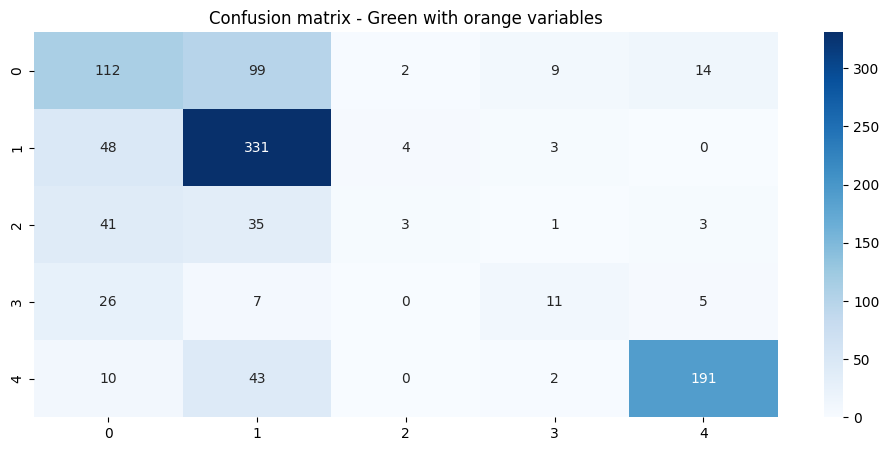

In [54]:
clf_vert_orange, acc_vert_orange, conf_vert_orange = affectation(
    df, 'cluster_vert', orange_columns
)
print(f"Cluster orange avec variables spécifiques - Précision : {acc_vert_orange:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_vert_orange, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Green with orange variables')
plt.show()

Cette fois, notre *RandomForestClassifier* obtient performances raisonnables pour la prédiction des clusters verts à partir des variables oranges avec un score de 65% d'accuracy.

## Segmentation de la partie vertes en utilisant les variables spécifiques

Cluster orange avec variables illustratives - Précision : 0.47


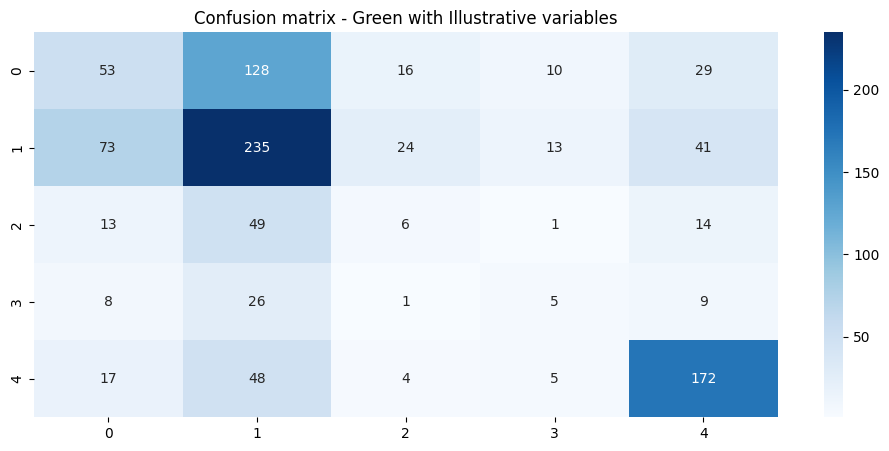

In [ ]:
clf_vert_spec, acc_vert_spec, conf_vert_spec = affectation(
    df, 'cluster_vert', illustrative_columns
)
print(f"Cluster orange avec variables illustratives - Précision : {acc_vert_spec:.2f}")
plt.figure(figsize=(12, 5))
sns.heatmap(conf_vert_spec, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix - Green with Illustrative variables')
plt.show()

Notre modèle obtient performances moyennes pour la prédiction des clusters verts à partir des variables spécifiques avec un score de 47% d'accuracy.

# Conclusion

Les résultats obtenus mettent en évidence les limites des variables illustratives pour prédire les clusters de manière fiable. En revanche, on remarque tout de même une meilleure capacité prédictive pour la prédiction des clusters verts à partir des variables oranges / illustratives que pour les clusters oranges.